## Salary Insights
This project analyzes salaries to help companies benchmark compensation and guide job seekers in making informed career decisions.

## Understanding the data

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
clean_salaries = pd.read_csv('ds_salaries_dirty.csv')

In [3]:
clean_salaries.info()
clean_salaries.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   work_year         100 non-null    int64  
 1   experience_level  90 non-null     object 
 2   employment_type   92 non-null     object 
 3   job_title         100 non-null    object 
 4   salary_in_usd     96 non-null     float64
 5   remote_ratio      100 non-null    int64  
 6   company_location  94 non-null     object 
 7   company_size      100 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 6.4+ KB


,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location,company_size
0,2022,SE,CT,Data Scientist,42183.0,50,IN,L
1,2023,MI,FL,Data Scientist,190371.0,100,IN,S
2,2020,MI,CT,DS,173946.0,50,IN,L
3,2022,NaN,FT,ML Engineer,146336.0,50,DE,S
4,2022,MI,FL,ML Engineer,9999999.0,100,NG,L
5,2023,MI,FT,Data Scientist,35539.0,50,GB,S
6,2020,NaN,FL,AI Specialist,214423.0,100,DE,XL
7,2020,EX,FL,ML Engineer,222339.0,50,IN,S
8,2022,MI,PT,DS,209426.0,100,US,S
9,2021,SE,FT,ML Engineer,5000000.0,100,IN,M


In [4]:
clean_salaries.shape

(100, 8)

## Checking for missing data

In [5]:
clean_salaries.isnull().sum()

work_year            0
experience_level    10
employment_type      8
job_title            0
salary_in_usd        4
remote_ratio         0
company_location     6
company_size         0
dtype: int64

## Checking for duplicate

In [6]:
clean_salaries.duplicated().sum()

0

In [7]:
clean_salaries = clean_salaries[clean_salaries['job_title'].astype(str).str.len() >= 3]
(clean_salaries['job_title'].str.len() < 3).any()

False

Four columns (experience_level, employment_type, salary_in_usd, and company_location) contain some missing data.

No duplicate data exists.

Entries in the job_title column that contained fewer than three characters were removed.

## Handling Missing Data

In [11]:
clean_salaries['experience_level'].fillna('EN', inplace=True)

C:\Users\AGU MICHAEL\AppData\Local\Temp\ipykernel_1412\1152820542.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_salaries['experience_level'].fillna('EN', inplace=True)


In [12]:
clean_salaries['experience_level'].isnull().any()

False

substituted "EN" for the missing values in the "experience_level" column.

In [14]:
clean_salaries['employment_type'].fillna('FT', inplace=True)

C:\Users\AGU MICHAEL\AppData\Local\Temp\ipykernel_1412\747224055.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_salaries['employment_type'].fillna('FT', inplace=True)


In [15]:
clean_salaries['employment_type'].isnull().any()

False

changed the column's "employment_type" missing values to "FT

In [16]:
valid_salary_mask = clean_salaries['salary_in_usd'].between(10_000, 1_000_000)
valid_salary_median = clean_salaries.loc[valid_salary_mask, 'salary_in_usd'].median()
clean_salaries.loc[~valid_salary_mask, 'salary_in_usd'] = valid_salary_median

In [17]:
replaced = clean_salaries[
    ((clean_salaries['salary_in_usd'] < valid_salary_mask) | (clean_salaries['salary_in_usd'] > valid_salary_mask)) &
    (clean_salaries['salary_in_usd'] == valid_salary_median)
]

print("Number of outliers replaced with median:", len(replaced))

Number of outliers replaced with median: 7


In order to determine which salary values fell within the specified range, I used the .between() method to create a boolean mask.

I calculated the median of the valid salary values.

To maintain consistency, I substituted the calculated median for all salaries below 10,000 or over 1,000,000.

In [19]:
clean_salaries['salary_in_usd'].fillna(clean_salaries['salary_in_usd'].median(), inplace=True)

C:\Users\AGU MICHAEL\AppData\Local\Temp\ipykernel_1412\594156458.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  clean_salaries['salary_in_usd'].fillna(clean_salaries['salary_in_usd'].median(), inplace=True)
C:\Users\AGU MICHAEL\AppData\Local\Temp\ipykernel_1412\594156458.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_salaries['

In [20]:
clean_salaries['salary_in_usd'].isnull().any()

False

Replaced missing values in 'salary_in_usd' with median

In [22]:
clean_salaries['company_location'].fillna('US', inplace=True)

C:\Users\AGU MICHAEL\AppData\Local\Temp\ipykernel_1412\1461777828.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_salaries['company_location'].fillna('US', inplace=True)


In [23]:
clean_salaries['company_location'].isnull().any()

False

changed the missing values in the "company_location" column to "US."

## Salary Trends by Experience

In [24]:
salary_trends = clean_salaries.groupby(['experience_level', 'employment_type'])['salary_in_usd'].mean().reset_index()

salary_trends['salary_in_usd'] = salary_trends['salary_in_usd'].round(2)

salary_trends

,experience_level,employment_type,salary_in_usd
0,EN,CT,91934.20
1,EN,FL,160093.33
2,EN,FT,132460.33
3,EN,PT,164572.86
4,EX,CT,166817.20
5,EX,FL,163361.25
6,EX,FT,175002.62
7,EX,PT,110018.50
8,MI,CT,170696.75
9,MI,FL,127798.00


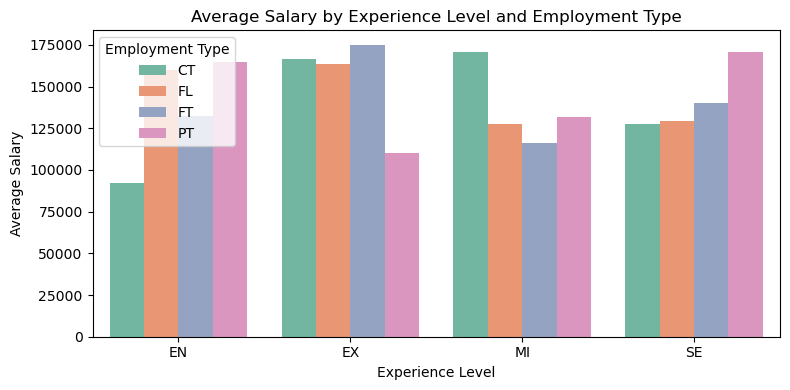

In [28]:
plt.figure(figsize=(8, 4))
sns.barplot(
    data=salary_trends,
    x='experience_level',
    y='salary_in_usd',
    hue='employment_type',
    palette='Set2'
)

plt.title("Average Salary by Experience Level and Employment Type")
plt.xlabel("Experience Level")
plt.ylabel("Average Salary")
plt.legend(title='Employment Type')
plt.tight_layout()
plt.show()

## Experience Level vs. Average Salary by Employment Type

An employee with an EN (entry-level) experience and a PT (part-time) role earn the highest average salary

An employee with an EN (entry-level) experience and a CT (Contract) role earn the lowest average salary

An employee with an EX (executive-level) experience and a FT (full-time) role earn the highest average salary

An employee with an EX (executive-level) experience and a PT (part-time) role earn the lowest average salary

An employee with a MI (mid-Level) experience and a CT (contract) role earn the highest average salary

An employee with a MI (mid-level) experience and a FT (full-time) role earn the lowest average salary

An employee with a SE (senior-level) experience and a PT (part-time) role earn the highest average salary

An employee with a SE (senior-level) experience and a CT (contract) role earn the lowest average salary

## Overall Findings

Executive level is a strong predictor of salary, especially in full-time roles, which show a consistent upward trend.

FL (freelancers) typically earn a respectable salary regardless of their level of experience.

## Remote Work Analysis

In [29]:
analysis = clean_salaries.copy()
remote_avg = analysis[analysis['remote_ratio'] == 100]['salary_in_usd'].mean()
onsite_avg = analysis[analysis['remote_ratio'] == 0]['salary_in_usd'].mean()
remote_salary_comparison = pd.DataFrame({
    'Work Type': ['Remote', 'On-site'],
    'Average Salary (USD)': [remote_avg, onsite_avg]
})
remote_salary_comparison['Average Salary (USD)'] = remote_salary_comparison['Average Salary (USD)'].round(2)

remote_salary_comparison

## Remote Work and Salary Comparison

Contrary to my expectations, the analysis shows that on-site roles have a higher average salary than remote roles. This may be influenced by:

A higher proportion of executive roles being on-site

Geographic location of on-site jobs being in high-paying regions

Also, a few entries were deleted.